<a href="https://colab.research.google.com/github/KartikayBhardwaj-dev/Ai_lab/blob/main/ai_lab_Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Toics**

- Tensors, Pytorch popular functions
- ANN, piprline, dataloader
- CNN, image Data
- RNN, Text Data  
- LSTM, GRU, Encoder-decoder, Transformer

## Modules

- torch - core module providing arrays(tensors) and math operation
- torch.autograd - automatic differentiation that records operation on tensors to compute gradient for optimization
- torch.nn - provides a neural network library, including layers, activations, loss functions
- torch.optim - contains optimization algo like SGD, Adam, RMSprop
- torch.utils.data - Utilities for handling data, including dataset and dataloader classes
- torch.distributed - tools for distributed training facillating parallel computaion
- torch.cuda - to enable gpu acceleration for tensor computation and model training
- torch.multiprocessing - utilities for parallesim using multiprocessing
- torch.quantization - tools for model quantization to reduce model size
- torch.onnx - supports exporting PyTorch models to ONNx (open Neural network exchange) format

**Torchvision** - used for compurter vision tasks

**TorchText** - used for text data
**TorchAudio** - used for audio data

## Creating tensor

In [ ]:
import torch

In [ ]:
first_var = torch.tensor(2, dtype=torch.float32) #scalar tensor
print(first_var)
print(first_var.ndim)  #gives dimension
a = torch.tensor([2,3,4]) #1d tensor
print(a)
print(a.ndim)
b = torch.tensor([[1, 2], [3, 4]])  #2d tensor/ matrix
print(b.ndim,b.shape)
print(f"data type of {a} is {a.dtype}") #check dtype of tensor
print(f"data type of {first_var} is {first_var.dtype}")


tensor(2.)
0
tensor([2, 3, 4])
1
2 torch.Size([2, 2])
data type of tensor([2, 3, 4]) is torch.int64
data type of 2.0 is torch.float32


torch.float32 --> ann, cnn, rnn use this 32 size as input

Empty Tensor - to store initialisation values which are almost empty

it store garbage value like location, etc its random

In [ ]:
c = torch.empty((2, 2), dtype=torch.int64)
c

tensor([[           0,            0],
        [         171, 433791696997]])

Zeroes

In [ ]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones

In [ ]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

Manual seed
- random (rand) -> gives random value acc to dimension, useful for initialisation for weights

In [ ]:
torch.rand(2, 2)

tensor([[0.3003, 0.3000],
        [0.4962, 0.2912]])

In [ ]:
#Arange (start, end, step_size) -> used to arange in ascend
torch.arange(0, 5, 2)

tensor([0, 2, 4])

In [ ]:
#Squeeze removing one dimension from the original one
b = torch.tensor([[[1, 2]]])
print(b)
torch.squeeze(b)


tensor([[[1, 2]]])


tensor([1, 2])

## AutoGrad -> automatic differentiation that records operation on tensors to compute gradient for optimization


In [ ]:
!pip install torchviz

In [ ]:
import torch
from torchviz import make_dot

In [ ]:
z = torch.tensor(3.0, requires_grad=True)
print(f"initial weight is: {z}")
y = z**2
print(f"after forward propagation, func is y^2: {y}")
y.backward()  #gradients have been computed
print(f"after gradient descent, func is 2y: {z.grad}")

initial weight is: 3.0
after forward propagation, func is y^2: 9.0
after gradient descent, func is 2y: 6.0


Gradient accumulation and clearing the gradients
- there is a problem if we do again and again it changing the values even if z is same

In [ ]:
print(z)
y = z**2
y.backward()
print(z.grad)
#to solve this problem we have to clear the gradient old value
z.grad.zero_()

tensor(3., requires_grad=True)
tensor(6.)


tensor(0.)

**Update the leaf variable values**
1. z was some variable or weights and to gradient it then  or we have some learning rate then what

In [ ]:
z.is_leaf


True

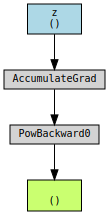

In [ ]:
# plotiing why z is leaf
make_dot(y, params={"z": z})

In [ ]:
learning_rate = 0.2
z -= learning_rate * z.grad

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
y = z**2
y.backward()

In [ ]:

with torch.no_grad():
  z -= 0.2 * z.grad
z

tensor(-1.9920, requires_grad=True)

**A simple training loop**

tensor(7., grad_fn=<AddBackward0>)


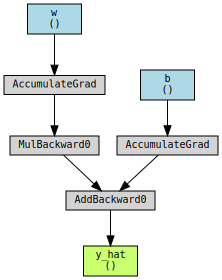

In [ ]:
w = torch.tensor(2.0, requires_grad=True) #weight
x = torch.tensor(3.0, requires_grad=False)  #input
b = torch.tensor(1.0, requires_grad=True) #bias
y_hat = w*x + b #forward
print(y_hat)
make_dot(y_hat, params={"w": w, "b": b, "y_hat": y_hat})


Doing simple training loop for some epochs to see that loss reduces or not

In [ ]:
x = torch.tensor(3.0, requires_grad=False)  #input
y = torch.tensor(1.0, requires_grad=False)  #label given
w = torch.tensor(2.0, requires_grad=True) #weight
b = torch.tensor(1.0, requires_grad=True)

for i in range(10):
  #forward pass
  y_hat = w*x + b

  #compute loss
  loss = (y_hat - y)**2 #squared loss

  print(f"Epoch no.{i} -> w = {w.data} , b = {b.data}")
  print("loss = ",loss)
  print()

  #backward pass
  loss.backward()

  #gradients

  learning_rate = 0.01
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
  w.grad.zero_(), b.grad.zero_()

Epoch no.0 -> w = 2.0 , b = 1.0
loss =  tensor(36., grad_fn=<PowBackward0>)

Epoch no.1 -> w = 1.6399999856948853 , b = 0.8799999952316284
loss =  tensor(23.0400, grad_fn=<PowBackward0>)

Epoch no.2 -> w = 1.3519999980926514 , b = 0.7839999794960022
loss =  tensor(14.7456, grad_fn=<PowBackward0>)

Epoch no.3 -> w = 1.1216000318527222 , b = 0.7071999907493591
loss =  tensor(9.4372, grad_fn=<PowBackward0>)

Epoch no.4 -> w = 0.9372800588607788 , b = 0.6457599997520447
loss =  tensor(6.0398, grad_fn=<PowBackward0>)

Epoch no.5 -> w = 0.7898240685462952 , b = 0.5966079831123352
loss =  tensor(3.8655, grad_fn=<PowBackward0>)

Epoch no.6 -> w = 0.6718592643737793 , b = 0.5572863817214966
loss =  tensor(2.4739, grad_fn=<PowBackward0>)

Epoch no.7 -> w = 0.5774874091148376 , b = 0.5258290767669678
loss =  tensor(1.5833, grad_fn=<PowBackward0>)

Epoch no.8 -> w = 0.5019899606704712 , b = 0.5006632804870605
loss =  tensor(1.0133, grad_fn=<PowBackward0>)

Epoch no.9 -> w = 0.4415919780731201 , b 

## **Training ANN**

1. Training pipeline
- define model
- for epoch in range(epochs)
- Forward pass
- Loss calculation
- Backward pass
- parameters update
2. Model evaluation
3. Improve training pipeline using nn.module and torch.optim, nn.module make our network into class
- Activation Functions(nn.Relu, nn.Sigmoid, nn.softmax)
- nn.Sequential Container
- Loss functions (nn.BCEloss, nn.CrossentropyLoss, etc)
4. Torch.optim (SGD, ADAM)
5. improve trainig pipeline using torch.utils.data Dataset and dataloader
- Data Loading
- Batching
- shuffling Sampling
- Parallezation



In [ ]:
import torch
from torch import nn
from sklearn.datasets import load_diabetes  #regression type data
from t
from torchsummary import summary
from sklearn.model_selection import train_test_split

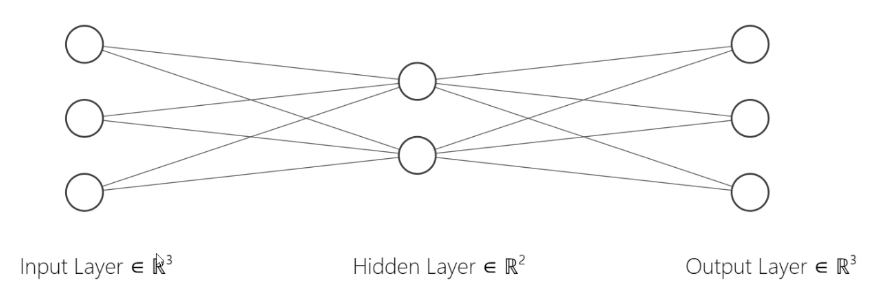

Practice above architecture with example data

In [ ]:
torch.manual_seed(42)
X = torch.rand(4, 3)  #input
network = nn.Sequential(nn.Linear(in_features=3, out_features=2),
                        nn.Sigmoid(),
                        nn.Linear(in_features=2, out_features=3),
                        nn.Softmax(dim=1))
print(network)

network.forward(X)
print(*network.parameters())
print()
summary(network, input_size=(3,))

Sequential(
  (0): Linear(in_features=3, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=3, bias=True)
  (3): Softmax(dim=1)
)
Parameter containing:
tensor([[ 0.4266,  0.0782,  0.2784],
        [-0.0815,  0.4451,  0.0853]], requires_grad=True) Parameter containing:
tensor([-0.2695,  0.1472], requires_grad=True) Parameter containing:
tensor([[-0.3258, -0.0829],
        [-0.2872,  0.4691],
        [-0.5582, -0.3260]], requires_grad=True) Parameter containing:
tensor([-0.1997, -0.4252,  0.0667], requires_grad=True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
           Sigmoid-2                    [-1, 2]               0
            Linear-3                    [-1, 3]               9
           Softmax-4                    [-1, 3]               0
Total params: 17
Trainable params: 17
Non-trainable params

Train architecture with diabetes data
- here architecture is diff from above

1. Model

In [ ]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #using train split for now later using datasets and dataloader
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

model = nn.Sequential(
    nn.Linear(in_features=10, out_features=8),
    nn.Sigmoid(),
    nn.Linear(in_features=8, out_features=8),
    nn.Sigmoid(),
    nn.Linear(in_features=8, out_features=1),

)
model

Sequential(
  (0): Linear(in_features=10, out_features=8, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

2. Model evaluation

In [ ]:
epochs = 3
learning_rate = 0.01

for epoch in range(epochs):
  #forward pass
  y_hat = model.forward(X_train)

  #compute loss
  loss_func = nn.MSELoss()
  loss = loss_func(y_hat.squeeze(), y_train)
  print(f"loss for epoch{epoch}: {loss}")

  #backward pass
  loss.backward()

  #update parameters
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad
  model.zero_grad()
  print(*model.parameters())

loss for epoch0: 29676.5859375
Parameter containing:
tensor([[ 0.1954,  0.0493,  0.2556,  0.0346, -0.0997,  0.0850, -0.0858,  0.1331,
          0.2824,  0.1828],
        [-0.1382,  0.1825,  0.0566,  0.1606, -0.1927, -0.3130, -0.1222, -0.2425,
          0.2595,  0.0911],
        [ 0.1311,  0.1000, -0.0052,  0.2477, -0.2246,  0.0200, -0.2160,  0.0977,
         -0.1086,  0.0971],
        [-0.0657,  0.2623, -0.1871, -0.1883, -0.1885,  0.2845,  0.1052,  0.3045,
         -0.2606, -0.3134],
        [-0.2475, -0.2127,  0.1277,  0.1129,  0.2627, -0.1634, -0.2153,  0.1675,
         -0.1282,  0.1917],
        [-0.0750,  0.1809, -0.2455, -0.1594,  0.0965,  0.0669, -0.0808,  0.1886,
          0.2152, -0.2292],
        [-0.1687,  0.2896, -0.1064, -0.1119, -0.3059, -0.1810,  0.0788, -0.0416,
         -0.2293,  0.0076],
        [-0.2159, -0.2683, -0.1739, -0.2766, -0.2013,  0.3161,  0.0596,  0.0976,
         -0.2948, -0.2075]], requires_grad=True) Parameter containing:
tensor([-0.1009,  0.0517, -0.260

### Optimizers, Batching, training

In [3]:
import torch
from torch import nn
from sklearn.datasets import load_diabetes  #regression type data
from torchsummary import summary
from sklearn.model_selection import train_test_split
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CLASS MAKING OF ANN MODEL

In [12]:
class myModuleAnn(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.network = nn.Sequential(
                        nn.Linear(in_features=in_features, out_features=8),
                        nn.Sigmoid(),
                        nn.Linear(in_features=8, out_features=8),
                        nn.Sigmoid(),
                        nn.Linear(in_features=8, out_features=out_features),
                        )
  def forward(self, x):
    return self.network(x)


OBJECT CREATION FROM CLASS

In [14]:
model1 = myModuleAnn(10, 1)
model1.to(device)
summary(model1, input_size=(10,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              88
           Sigmoid-2                    [-1, 8]               0
            Linear-3                    [-1, 8]              72
           Sigmoid-4                    [-1, 8]               0
            Linear-5                    [-1, 1]               9
Total params: 169
Trainable params: 169
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Data

In [19]:
X,y = load_diabetes(return_X_y=True, as_frame=True)
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_tr.values, dtype=torch.float32, device= device)
X_test = torch.tensor(X_te.values, dtype=torch.float32, device=device)
y_train = torch.tensor(y_tr.values, dtype=torch.float32, device=device)
y_test = torch.tensor(y_te.values, dtype=torch.float32, device=device)

Model Evaluation

In [51]:
loss_func = nn.MSELoss()      #loss
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)  #optimizers

epochs = 3
model1.train()  #trainig phase
for epoch in range(epochs):
  #forward pass
  y_hat = model1(X_train)

  #compute loss
  loss = loss_func(y_hat.squeeze(), y_train)
  print(f"loss for epoch{epoch}: {loss}")

  optimizer.zero_grad()   #to make gradient 0 before every backward
  #backward pass
  loss.backward()

  #update parameters
  # with torch.no_grad():
  #   for param in model.parameters():
  #     param -= learning_rate * param.grad
  # model.zero_grad()
  # print(*model.parameters())

  #update parameter using optimizers
  optimizer.step()



loss for epoch0: 6075.7978515625
loss for epoch1: 6075.7880859375
loss for epoch2: 6075.77734375


In [52]:

#evaluation phase
model1.eval()
with torch.no_grad():
  y_hat = model1(X_train)
  loss = loss_func(y_hat.squeeze(), y_test)
  print(loss.item())


RuntimeError: The size of tensor a (353) must match the size of tensor b (89) at non-singleton dimension 0

Improving training pipeline using DataLoader/Batching

In [53]:
from torch.utils.data import TensorDataset
TensorDataset(X_train, y_train)   #if data not in tensor it convert

In [55]:
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=33, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=33, shuffle=False) #Consistency of shuffle

Using mini-batch gradients descent

In [64]:

model1 = myModuleAnn(10, 1)
model1.to(device)
loss_func = nn.MSELoss()      #loss
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)  #optimizers

epochs = 3

#trainig phase
model1.train()

for epoch in range(epochs):
  loss_per_epoch = 0
  #forward pass
  for features, labels in train_loader:
    features = features.to(device)
    labels = labels.to(device)
    y_hat = model1(features)
    loss = loss_func(y_hat.squeeze(), labels)
    loss_per_epoch += loss.item()

    optimizer.zero_grad()   #to make gradient 0 before every backward
    #backward pass
    loss.backward()

    #update parameter using optimizers
    optimizer.step()
  print(loss_per_epoch)



161315.22265625
68510.9892578125
67659.82763671875


In [65]:

#evaluation phase
model1.eval()
with torch.no_grad():
  loss_per_epoch = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)
    y_hat = model1(features)
    loss = loss_func(y_hat.squeeze(), labels)
    loss_per_epoch += loss.item()
  print(loss_per_epoch)


15976.2939453125
